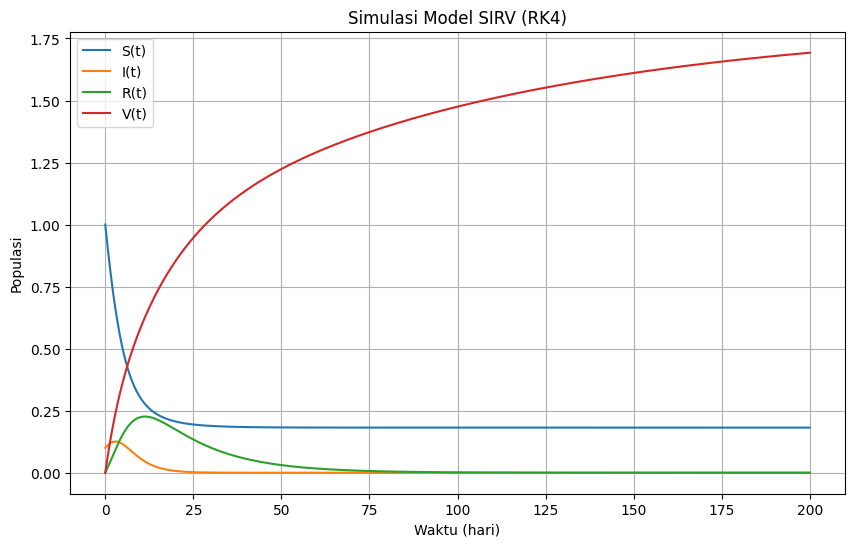

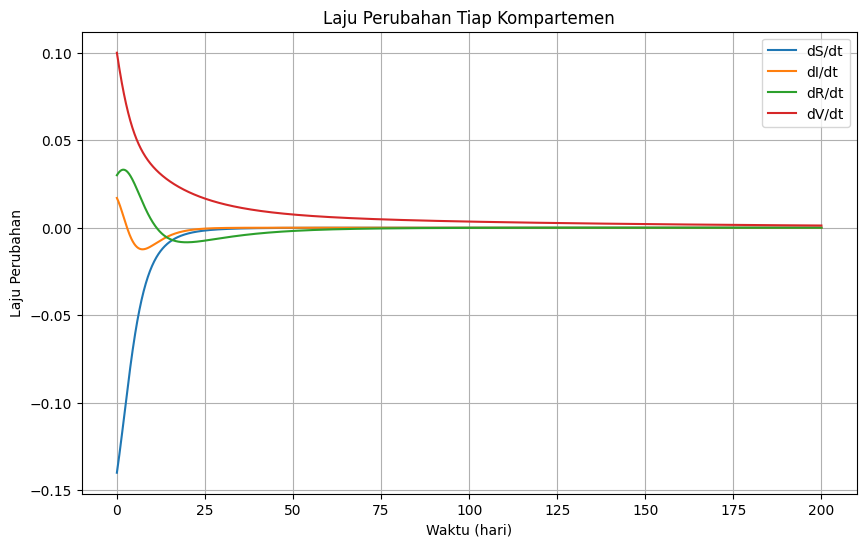

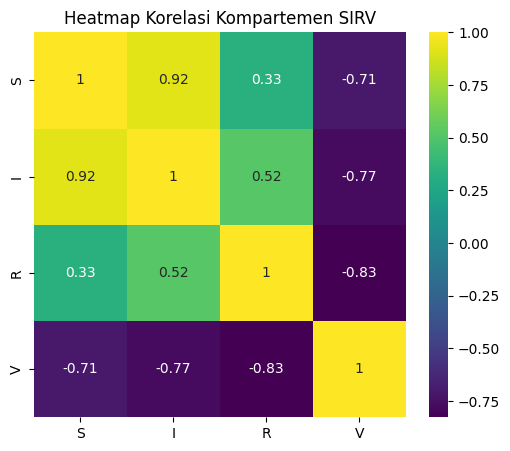


--- Tabel Hasil Simulasi Numerik SIRV (Agregasi Bulanan) ---
                Date     S     I     R      V
 March 01 - 30, 2022 0.189 0.001 0.101  1.023
 March 31 - 29, 2022 0.182 0.000 0.017  1.292
 April 30 - 29, 2022 0.182 0.000 0.003  1.438
   May 30 - 28, 2022 0.182 0.000 0.000  1.538
  June 29 - 28, 2022 0.182 0.000 0.000  1.611
  July 29 - 27, 2022 0.182 0.000 0.000  1.665
August 28 - 26, 2022 0.182 0.000 0.000  1.693
               TOTAL 1.281 0.001 0.121 10.260
             Average 0.183 0.000 0.017  1.466


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, timedelta
import seaborn as sns

# =========================================================
# 1. PARAMETER MODEL & SETUP SIMULASI
# =========================================================

alpha, beta, psi, gamma = 0.5, 0.3, 0.1, 0.05
mu, mu_c, k = 0.01, 0.02, 0.02
t0, t_end, h = 0, 200, 0.1
t = np.arange(t0, t_end + h, h)

# kondisi awal
S0, I0, R0, V0 = 1, 0.1, 0, 0

# Sistem Persamaan Diferensial SIRV
def f(S, I, R, V):
    dS = k - mu*S - alpha*S*I - psi*S
    dI = alpha*S*I - (mu + mu_c + beta)*I
    dR = beta*I - (mu + gamma)*R
    dV = gamma*R + psi*S - mu*V
    return np.array([dS, dI, dR, dV])

# =========================================================
# 2. METODE RUNGE–KUTTA ORDE 4 (RK4)
# =========================================================

S_list, I_list, R_list, V_list = [S0], [I0], [R0], [V0]
S, I, R, V = S0, I0, R0, V0

for _ in t[1:]:
    k1 = f(S, I, R, V)
    k2 = f(S + 0.5*h*k1[0], I + 0.5*h*k1[1], R + 0.5*h*k1[2], V + 0.5*h*k1[3])
    k3 = f(S + 0.5*h*k2[0], I + 0.5*h*k2[1], R + 0.5*h*k2[2], V + 0.5*h*k2[3])
    k4 = f(S + h*k3[0], I + h*k3[1], R + h*k3[2], V + h*k3[3])

    delta = h * (k1 + 2*k2 + 2*k3 + k4) / 6
    S, I, R, V = S + delta[0], I + delta[1], R + delta[2], V + delta[3]

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    V_list.append(V)

# =========================================================
# VISUALISASI 1 – SIMULASI NUMERIK S, I, R, V
# =========================================================

plt.figure(figsize=(10,6))
plt.plot(t, S_list, label="S(t)")
plt.plot(t, I_list, label="I(t)")
plt.plot(t, R_list, label="R(t)")
plt.plot(t, V_list, label="V(t)")
plt.xlabel("Waktu (hari)")
plt.ylabel("Populasi")
plt.title("Simulasi Model SIRV (RK4)")
plt.grid()
plt.legend()
plt.show()

# =========================================================
# VISUALISASI 2 – LAJU PERUBAHAN (dS/dt, dI/dt, dR/dt, dV/dt)
# =========================================================

dS_list, dI_list, dR_list, dV_list = [], [], [], []
for S, I, R, V in zip(S_list, I_list, R_list, V_list):
    dS, dI, dR, dV = f(S, I, R, V)
    dS_list.append(dS)
    dI_list.append(dI)
    dR_list.append(dR)
    dV_list.append(dV)

plt.figure(figsize=(10,6))
plt.plot(t, dS_list, label="dS/dt")
plt.plot(t, dI_list, label="dI/dt")
plt.plot(t, dR_list, label="dR/dt")
plt.plot(t, dV_list, label="dV/dt")
plt.xlabel("Waktu (hari)")
plt.ylabel("Laju Perubahan")
plt.title("Laju Perubahan Tiap Kompartemen")
plt.grid()
plt.legend()
plt.show()

# =========================================================
# VISUALISASI 3 – HEATMAP KORELASI
# =========================================================

df_corr = pd.DataFrame({
    "S": S_list,
    "I": I_list,
    "R": R_list,
    "V": V_list
})

plt.figure(figsize=(6,5))
sns.heatmap(df_corr.corr(), annot=True, cmap="viridis")
plt.title("Heatmap Korelasi Kompartemen SIRV")
plt.show()

# =========================================================
# 4. TABEL AGREGASI BULANAN + TOTAL + AVERAGE
# =========================================================

start_date = date(2022, 3, 1)
data_for_table = []
current_day_sim, days_in_period = 0, 30

while current_day_sim < t_end:
    end_day_sim = min(current_day_sim + days_in_period, t_end)
    end_index = int(end_day_sim / h)

    if end_index < len(S_list):
        current_month_start = start_date + timedelta(days=int(current_day_sim))
        period_end_date = current_month_start + timedelta(days=days_in_period - 1)
        date_str = f"{current_month_start.strftime('%B %d')} - {period_end_date.strftime('%d, %Y')}"

        data_for_table.append({
            "Date": date_str,
            "S": round(S_list[end_index], 3),
            "I": round(I_list[end_index], 3),
            "R": round(R_list[end_index], 3),
            "V": round(V_list[end_index], 3)
        })

    current_day_sim += days_in_period

df_table = pd.DataFrame(data_for_table)

# Tambahkan TOTAL
df_total = pd.DataFrame([{
    "Date": "TOTAL",
    "S": df_table["S"].sum().round(3),
    "I": df_table["I"].sum().round(3),
    "R": df_table["R"].sum().round(3),
    "V": df_table["V"].sum().round(3)
}])

# Tambahkan AVERAGE
df_avg = pd.DataFrame([{
    "Date": "Average",
    "S": df_table["S"].mean().round(3),
    "I": df_table["I"].mean().round(3),
    "R": df_table["R"].mean().round(3),
    "V": df_table["V"].mean().round(3)
}])

df_table_final = pd.concat([df_table, df_total, df_avg], ignore_index=True)

print("\n--- Tabel Hasil Simulasi Numerik SIRV (Agregasi Bulanan) ---")
print(df_table_final.to_string(index=False))
